# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



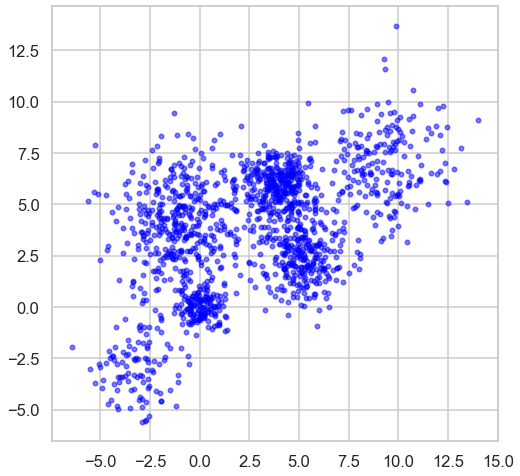

In [4]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [5]:
#This is a function that we will use it to display the data after clustering it using the scatter plot
def plot_clustered_data(data, labels):
    # Get unique labels
    unique_labels = set(labels)

    # Create a color map with a unique color for each label
    colors = plt.cm.get_cmap('Set1', len(unique_labels))

    # Plot the data points with a different color for each label
    for label in unique_labels:
        indices = (labels == label)
        plt.scatter(data[indices, 0], data[indices, 1], color=colors(label), label=f'Cluster {label}')

    # Add a legend and title
    plt.legend()
    plt.title('Clustered Data')

    # Show the plot
    plt.show()


In [6]:
#kMeans clustering function
def kmeans_clustering(data, k):
    kmeans = KMeans(n_clusters=k)
    
    # Fit KMeans object to the data
    kmeans.fit(data)
    
    # Retrieve cluster labels
    labels = kmeans.labels_
    
    return labels


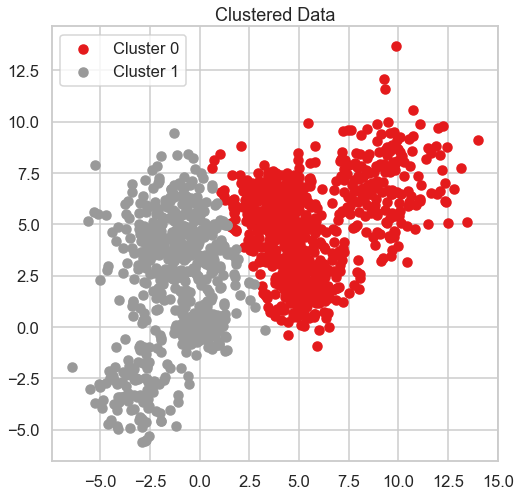

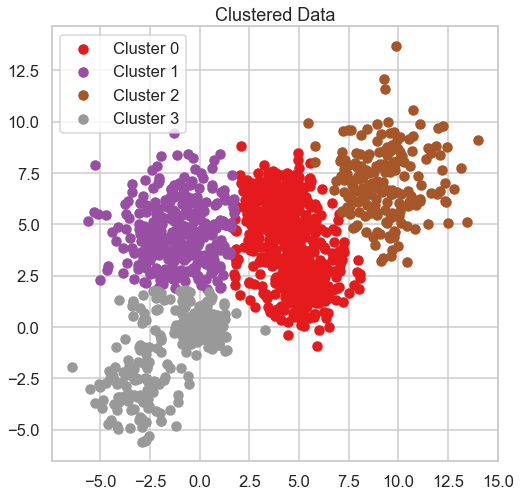

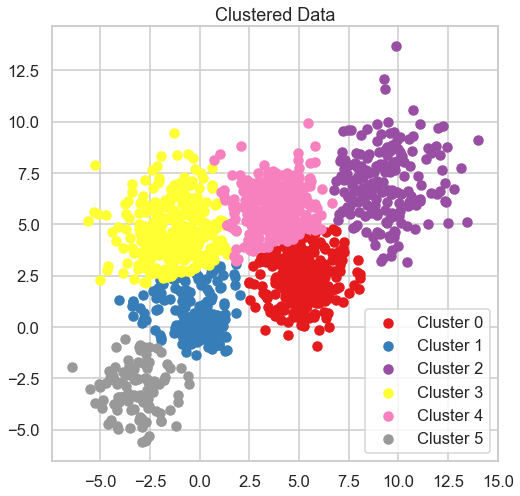

In [7]:
#getting the output using different values for k and display the data after clustering it
for i in range(2,7,2):
    kMeans_labels = kmeans_clustering(Multi_blob_Data,i)
    plot_clustered_data(Multi_blob_Data,kMeans_labels)

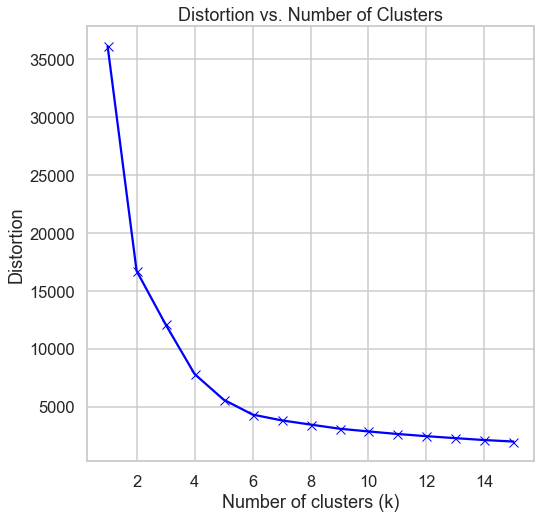

In [8]:
#plotting the distortion vs the number of the clusters so that we can detect the apprpriate k value from elbow method

def plot_distortion(data, kmax):
    
    # Initialize list to store distortion values
    distortions = []
    
    # Loop over values of k to calculate distortions
    for k in range(1, kmax+1):
        # Initialize KMeans object with current k value
        kmeans = KMeans(n_clusters=k)
        # Fit KMeans object to the data
        kmeans.fit(data)
        # Retrieve sum of squared distances (inertia) from KMeans object
        distortion = kmeans.inertia_
        # Append distortion value to list
        distortions.append(distortion)
        
    # Plot distortion function
    plt.plot(range(1, kmax+1), distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Distortion vs. Number of Clusters')
    plt.show()
plot_distortion(Multi_blob_Data,15)

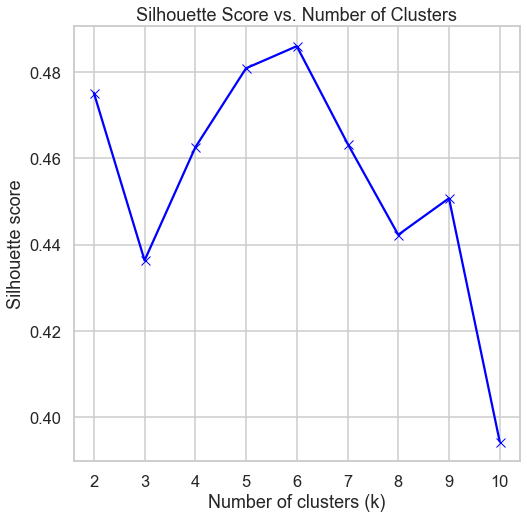

In [9]:
#calculate the silhouette_score vs the number of the clusters so that we can detect the apprpriate k value
def plot_silhouette(data, kmax):
    # Initialize list to store silhouette scores
    silhouette_scores = []
    
    # Loop over values of k to calculate silhouette scores
    for k in range(2, kmax+1):
        # Initialize KMeans object with current k value
        kmeans = KMeans(n_clusters=k)
        # Fit KMeans object to the data
        kmeans.fit(data)
        # Compute silhouette score for current k value
        silhouette = silhouette_score(data, kmeans.labels_)
        # Append silhouette score to list
        silhouette_scores.append(silhouette)
        
    # Plot silhouette scores
    plt.plot(range(2, kmax+1), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.show()
plot_silhouette(Multi_blob_Data,10)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [17]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering(data, n_clusters, affinity='euclidean', linkage='average', distance_threshold=None):
    # Create an instance of AgglomerativeClustering with the specified parameters
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage, distance_threshold=distance_threshold)

    # Fit the Agglomerative clustering algorithm to the data
    agglomerative.fit(data)

    # Get the cluster labels
    labels = agglomerative.labels_

    return labels

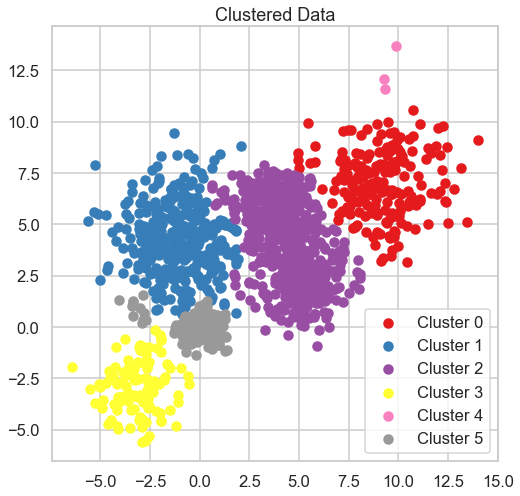

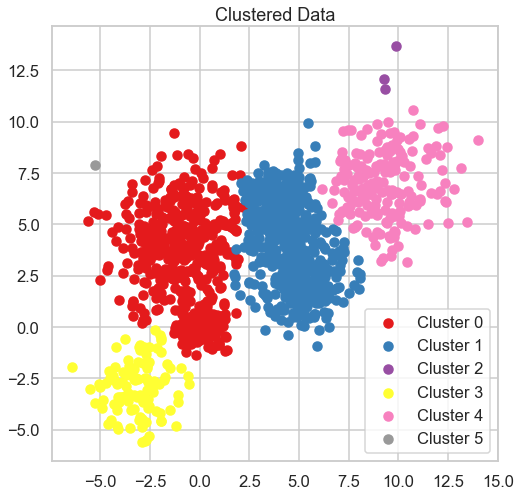

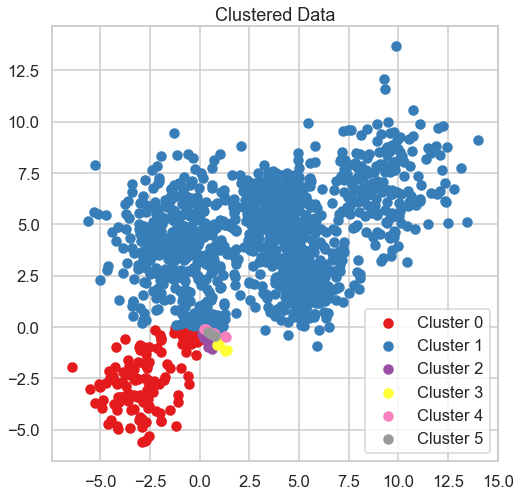

In [18]:
labels1 = agglomerative_clustering(Multi_blob_Data, n_clusters=6, affinity='euclidean', linkage='average', distance_threshold=None)
labels2 = agglomerative_clustering(Multi_blob_Data, n_clusters=6, affinity='manhattan', linkage='average', distance_threshold=None)
labels3 = agglomerative_clustering(Multi_blob_Data, n_clusters=6, affinity='cosine', linkage='single', distance_threshold=None)
plot_clustered_data(Multi_blob_Data,labels1)
plot_clustered_data(Multi_blob_Data,labels2)
plot_clustered_data(Multi_blob_Data,labels3)

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
def apply_dbscan(data, eps, min_samples):
    # Initialize DBSCAN object with specified eps and min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    # Fit DBSCAN object to the data and obtain cluster labels
    labels = dbscan.fit_predict(data)
    
    return labels


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 